In [1]:
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
def plot_network(ax, edges, nodes, C):
    lines = [ [(nodes[a,0], nodes[a,1]), (nodes[b,0], nodes[b,1])]
             for a, b in edges]
    
    widths = C.copy()
    widths[widths < 1e-5] = 0.0
    widths = 4*(widths/widths.max())**0.25
    
    
    lc = LineCollection(lines, linewidths=widths, colors='k', capstyle='round')
    ax.add_collection(lc)
    
    minx, maxx = np.min(nodes[:,0]), np.max(nodes[:,0])
    miny, maxy = np.min(nodes[:,1]), np.max(nodes[:,1])
    
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    
    ax.axis('equal')
    
    ax.set_xticks([])
    ax.set_yticks([])

In [18]:
fname = 'results_data.txt'

def load_txt(fn):
    data = np.loadtxt(fn)
    
    # remove outliers due to too small sigma
    data = data[data[:,4] < 10000,:]
        
    # load network
    edges = np.array(np.loadtxt(fn[:-8] + 'edges.txt'), dtype=int) - 1
    nodes = np.loadtxt(fn[:-8] + 'nodes.txt')
    
    # load list of conductivities for each network
    conductivities = np.loadtxt(fn[:-8] + 'conductivities.txt')
    
    
    # other data in the files:
#     kappas = data[:,0]
#     rhos = data[:,1]
#     sigmas = data[:,2]
#     cycles = data[:,6]
#     costs = data[:,7]
#     area_penalties = data[:,9]
    
    return edges, nodes, conductivities

edges, nodes, Cs = load_txt(fname)


<IPython.core.display.Javascript object>


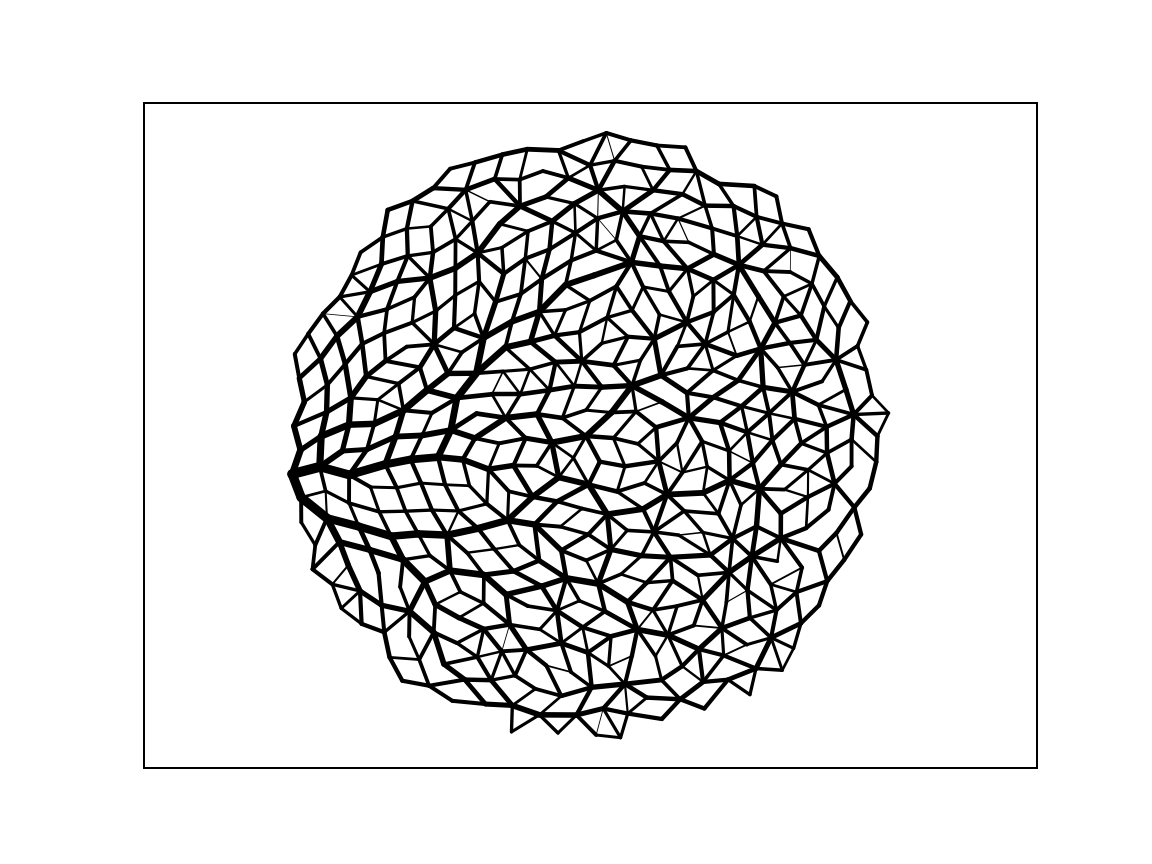

In [19]:
f, ax = plt.subplots()

# example plot of a network
plot_network(ax, edges, nodes, Cs[500,:])